# Corresponding Notebook for Presentation

### Initiations of Constants, Libraries, and Environments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib
#%matplotlib notebook

**Here are all the given constants for the Project.**


These Quantities are tied to the dielectric material:

- `R`:   Radius of the Dielectric Water Sphere
- `ds`:  Discretized Stepsize Over all Space
- `X_e`: Dielectric Constant of Water
- `e_0`: Permittivity of Free Space

These Quantities are tied to the Conductor Shape Parameters:

- `l`:           Length of Conducting Cube
- `r`:           Radius of the Conducting Sphere
- `cone_height`: Height of the Conducting Cone
- `cyl_height`:  Height of the Conducting Cylinder
- `V`: Potential of the Surface of the Conductors

In [2]:
R = 1
ds = 0.1
x_e = 80.1
e_0 = 8.85e-12

cone_height = 0.5*R
cyl_height = 0.7*R
l = 0.5
r = 0.5
V = 5

**Creation of the Environment**

In [3]:
x = np.arange(-2*R,2*R+ds,ds)
y = np.arange(-2*R,2*R+ds,ds)
z = np.arange(-2*R,2*R+ds,ds)
X,Y,Z = np.meshgrid(x,y,z,indexing='ij')                                         

**Creation of Coupled Potential Array**

This potential array is directly related to the positions within the environment

In [4]:
volt = np.zeros((x.size,y.size,z.size),dtype = np.float64)

**Masks for Inside the Dielectric and Outside of Dielectric**

In [5]:
perm_index = np.where(X**2 + Y**2 + Z**2 <= R**2) 
other_index = np.where(X**2 + Y**2 + Z**2 > R**2)     

**Conductor Functions**

This Function initializes the Potential along the conductors' interior and surface. There is a safety feature for each shape to ensure the cube does not excede the size of the dielectric sphere

In [6]:
def cond_cube(l,volt):
    if l*np.sqrt(2) >= R:
        print('Your chosen sidelength of the cube is larger than the radius of the medium of the water')
        return None
    cube_index = np.where((np.abs(X) <= l) & (np.abs(Y) <=l) & (np.abs(Z) <= l))
    volt[cube_index] = V
    return cube_index, volt

def cond_cyl(R,h,volt):
    if h >= R:
        print('Your chosen height of the cylinder is larger than the the radius of the medium of the water')
        return None
    h = 0.5*h    #shrinking height by 50% to keep it inside sphere
    rr = 0.5*R   #shrinking radius by 50% to keep it inside sphere
    cyl_index = np.where((np.abs(Z) <= h) & (X**2 + Y**2 <= rr**2 - h**2))
    volt[cyl_index] = V
    return cyl_index, volt

def cond_cone(R,h,volt):
    if h >= R:
        print('Your chosen height of the cone is larger than the the radius of the medium of the water')
        return None       
    rr = (h*np.sqrt(R**2-h**2)) / (R*np.cos(np.arctan(np.sqrt(R**2-h**2)/h)))                                       #radius of the cone based on parametrization onto the sphere 
    rr = 0.5*rr                                                                                                  #shrinking radius by 50% to keep it inside sphere
    cone_index = np.where((Z >= 0) & (Z <=h) &
                           (X**2 + Y**2 <= R**2 - h**2) & (X**2 + Y**2 <= (Z*rr/h)**2))
    volt[cone_index] = V
    return cone_index, volt, rr

**Method of Relaxation Function**

In [7]:
def relax(volt,index, num):
    count = 0
    while(num != count):

        #grabs the old voltage 
        old_volt = volt 
        
        #re-inforces the voltage boundary condition, or else it washes out                                                                                                      
        volt[index] = V                                                                                                         
        for i in range(1,volt.shape[0]-1):
            for j in range(1,volt.shape[1]-1):
                for k in range(1,volt.shape[2]-1):
                    volt[i,j,k] =  (old_volt[i+1,j,k] +  old_volt[i-1,j,k] +  old_volt[i,j+1,k] +  
                                    old_volt[i,j-1,k] + old_volt[i,j,k+1] +  old_volt[i,j,k-1])/6
        count = count + 1
    return volt

**Plot of the Environment**

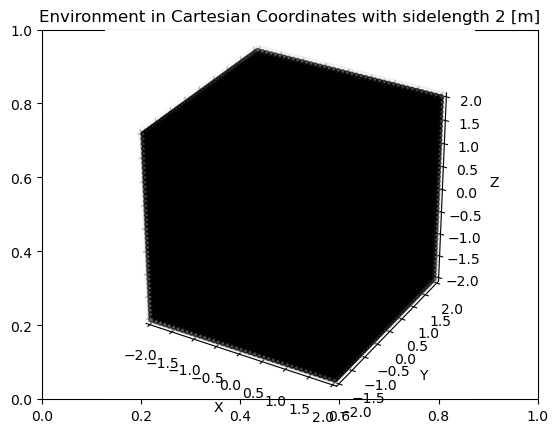

In [8]:
fig = plt.figure()
plt.title(f'Environment in Cartesian Coordinates with sidelength {2*R} [m]')
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z,color = 'black')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
ax.set_xlim(-2*R,2*R)
ax.set_ylim(-2*R,2*R)
ax.set_zlim(-2*R,2*R)
plt.show()

**Plot of the Dielectric Sphere**

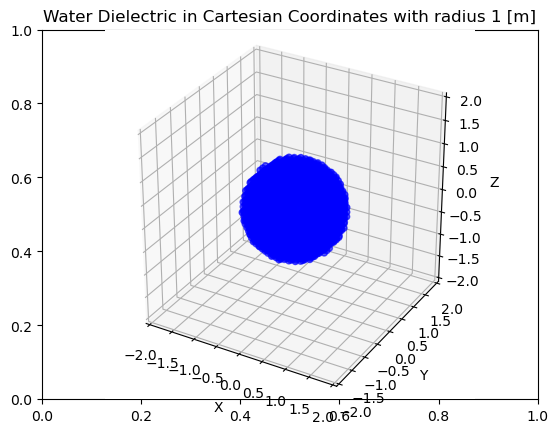

In [9]:
fig = plt.figure()
plt.title(f'Water Dielectric in Cartesian Coordinates with radius {R} [m]')
ax = fig.add_subplot(projection='3d')
ax.scatter(X[perm_index], Y[perm_index], Z[perm_index],color = 'blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
ax.set_xlim(-2*R,2*R)
ax.set_ylim(-2*R,2*R)
ax.set_zlim(-2*R,2*R)
plt.show()

## Part 1: The Cube

### Cube Potential Calculations

**Creation of Cube and Potential Calculation**

Also computing the midlength of the cube for slicing later

In [10]:
cube_index, cube_volt = cond_cube(l,volt)        
new_cube = relax(cube_volt,cube_index,100) 
cube_len = cube_volt.shape[2]                    
cube_mid_len = int(round(cube_len,0)/2)  

**Plot of Cube to Ensure Correct Masking**

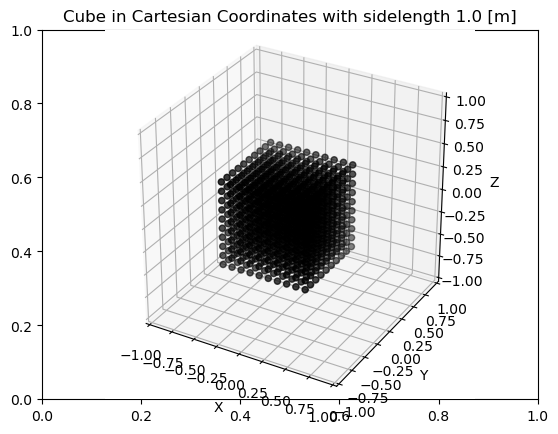

In [11]:
#Plotting positions of cube:
fig = plt.figure()
plt.title(f'Cube in Cartesian Coordinates with sidelength {2*l} [m]')
ax = fig.add_subplot(projection='3d')
ax.scatter(X[cube_index], Y[cube_index], Z[cube_index],color = 'black')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)
ax.set_zlim(-R,R)
plt.show()

#### Contour Plots of Potential of the Cube

**Constant X**

Locator attempting to generate 5001 ticks ([0.0, ..., 5.0]), which exceeds Locator.MAXTICKS (1000).


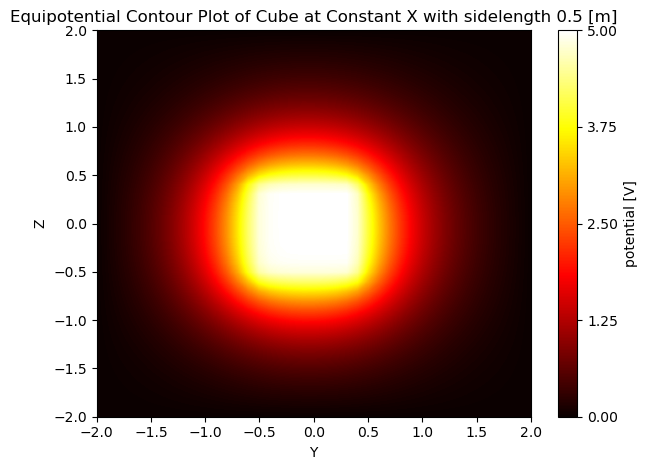

<Figure size 640x480 with 0 Axes>

In [12]:
plt.contourf(X[:,:,cube_mid_len],Y[:,:,cube_mid_len],new_cube[:,:,cube_mid_len],levels = 5000,cmap = 'hot')
plt.title(f'Equipotential Contour Plot of Cube at Constant X with sidelength {l} [m]')
plt.xlabel('Y')
plt.ylabel('Z')
plt.xlim(-2*R,2*R)
plt.ylim(-2*R,2*R)
plt.colorbar(label = 'potential [V]',ticks = np.linspace(0,V,V))
plt.tight_layout()
plt.show()

**Constant Y**

Locator attempting to generate 5001 ticks ([0.0, ..., 5.0]), which exceeds Locator.MAXTICKS (1000).


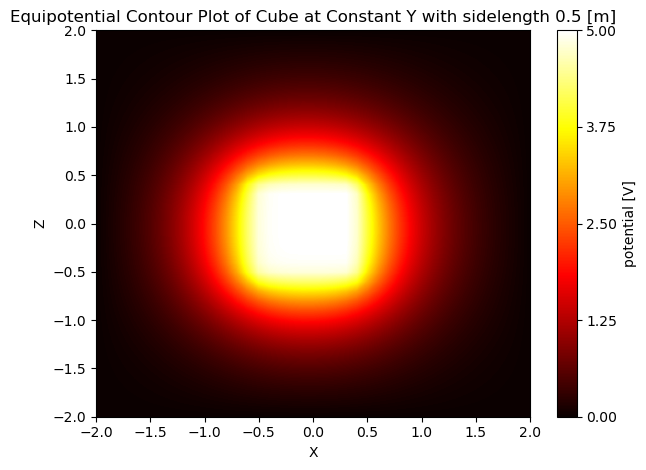

<Figure size 640x480 with 0 Axes>

In [13]:
plt.contourf(X[:,:,cube_mid_len],Y[:,:,cube_mid_len],new_cube[:,cube_mid_len,:],levels = 5000,cmap = 'hot')
plt.title(f'Equipotential Contour Plot of Cube at Constant Y with sidelength {l} [m]')
plt.xlabel('X')
plt.ylabel('Z')
plt.colorbar(label = 'potential [V]',ticks = np.linspace(0,V,V))
plt.tight_layout()
plt.show()

**Constant Z**

Locator attempting to generate 5001 ticks ([0.0, ..., 5.0]), which exceeds Locator.MAXTICKS (1000).


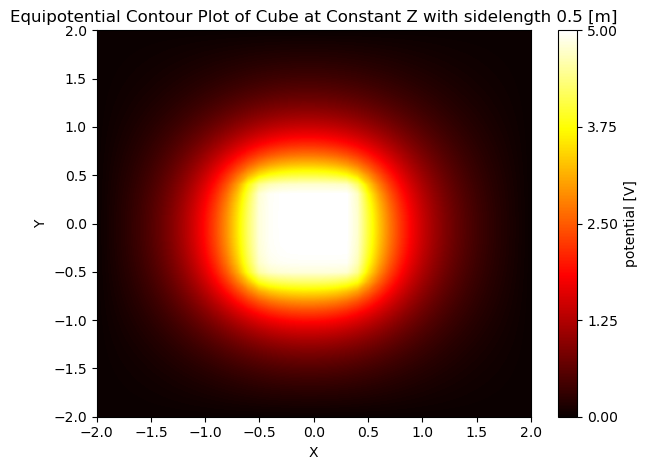

In [14]:
plt.contourf(X[:,:,cube_mid_len],Y[:,:,cube_mid_len],new_cube[:,:,cube_mid_len],levels = 5000,cmap = 'hot')
plt.title(f'Equipotential Contour Plot of Cube at Constant Z with sidelength {l} [m]')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label = 'potential [V]',ticks = np.linspace(0,V,V))
plt.tight_layout()
plt.show()

### Electric Field Cube Calculations

**Creation of Two Separate Potential Arrays**

In [15]:
V_in_cube = np.zeros((new_cube.shape),dtype = np.float64)                                                                                                   #sets the potential within the dielectric at zero
V_in_cube[perm_index] = new_cube[perm_index]

**The Electric Field Inside the Dielectric**

In [16]:
E_cube_in = np.gradient((V_in_cube) * -np.ones((V_in_cube.shape),dtype = np.float64) / (np.ones((V_in_cube.shape),dtype = np.float64)*x_e))                      
x_E_cube_in = E_cube_in[0]                                                                                                                       
y_E_cube_in = E_cube_in[1]                                                                                                                             
z_E_cube_in = E_cube_in[2]                                                                  

**The Electric Field Outside the Dielectric**

In [17]:
E_cube_out =  np.gradient(new_cube) * -np.ones((new_cube.shape),dtype = np.float64)        
x_E_cube_out = E_cube_out[0]                                                                
y_E_cube_out = E_cube_out[1]                                                                  
z_E_cube_out = E_cube_out[2]                                                           

**3D Electric Field Plot**

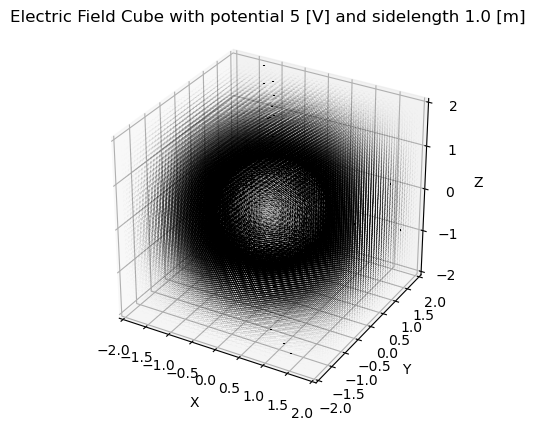

In [18]:

ax = plt.figure().add_subplot(projection='3d')
plt.title(f"Electric Field Cube with potential {V} [V] and sidelength {2*l} [m]")
ax.quiver(X[perm_index], Y[perm_index], Z[perm_index], x_E_cube_in[perm_index], y_E_cube_in[perm_index], z_E_cube_in[perm_index], length=0.1,arrow_length_ratio=0.5,color = 'black')
ax.quiver(X[other_index], Y[other_index], Z[other_index], x_E_cube_out[other_index], y_E_cube_out[other_index], z_E_cube_out[other_index], length=.1,arrow_length_ratio=0.5,color = 'black')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
ax.set_xlim(-2*R,2*R)
ax.set_ylim(-2*R,2*R)
plt.show()

**2D Electric Field Plot**

(-2.0, 2.0)

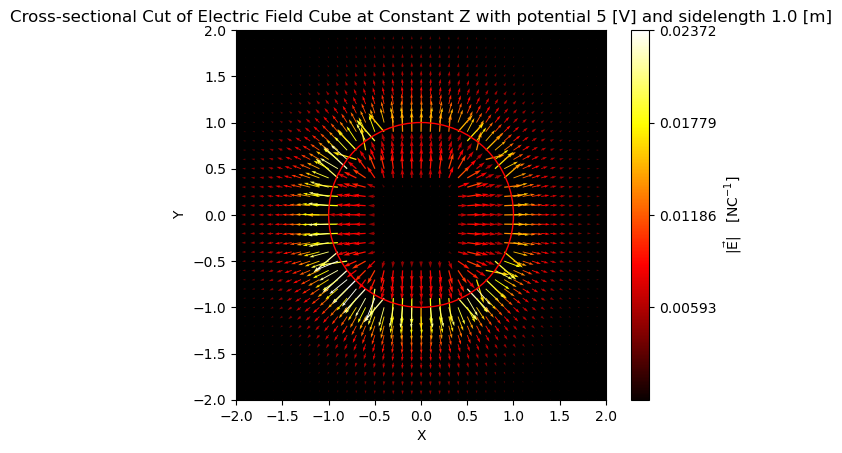

In [19]:
#Takes slices from inside the cube holding z constant
x_in_pl_cube = x_E_cube_in[:, :, cube_mid_len]       
y_in_pl_cube = y_E_cube_in[:, :, cube_mid_len]  

#Taking slices from outside the cube holding z constant
x_out_pl_cube = x_E_cube_out[:, :, cube_mid_len]     
y_out_pl_cube = y_E_cube_out[:, :, cube_mid_len]

#Grabing correlated positonal points at constant z
X_cube= X[:, :, cube_mid_len]                         
Y_cube = Y[:, :, cube_mid_len]
Z_cube = Z[:, :, cube_mid_len]

#grabs 2D indices of the slices that is within the dielectric
new_index = np.where(X_cube**2 + Y_cube**2 + Z_cube**2 < R) 

#grabs 2D indices of the slices that is outside the dielectric
out_index = np.where(X_cube**2 + Y_cube**2 + Z_cube**2 > R)    

#relating color of plot to magnitude of vectors
color_in_cube = np.sqrt(x_in_pl_cube**2 + y_in_pl_cube**2)      
color_out_cube = np.sqrt(x_out_pl_cube**2 + y_out_pl_cube**2)   

fig, ax = plt.subplots()
ax.set_title(f"Cross-sectional Cut of Electric Field Cube at Constant Z with potential {V} [V] and sidelength {2*l} [m]")
ax.set_aspect('equal')
ax.set_facecolor('black')
ax.set_xlabel('X')
ax.set_ylabel('Y')
quiver_1 = ax.quiver(X_cube[new_index],Y_cube[new_index],x_in_pl_cube[new_index],y_in_pl_cube[new_index],color_in_cube[new_index],units='xy',angles='xy',scale_units='xy',headlength=5,cmap='hot')    #inside dielectric
quiver_2 = ax.quiver(X_cube[out_index],Y_cube[out_index],x_out_pl_cube[out_index],y_out_pl_cube[out_index],color_out_cube[out_index],units='xy',angles='xy',scale_units='xy',headlength=5,cmap='hot') #outside dielecrtic
ax.add_patch(plt.Circle((0, 0), R, color='red', fill=False))
cbar = plt.colorbar(quiver_1,ticks = np.linspace(0,np.max(color_in_cube),5))     
cbar.set_label(r'$|\mathrm{\vec{E}}| \quad [\mathrm{N C^{-1}}]$')                          
ax.set_xlim(-2*R,2*R)
ax.set_ylim(-2*R,2*R)

### Charge Density Calculations

**Masking for Region Just Outside Cube**

In [20]:
pos_cube_mask = np.zeros((x.size,y.size,z.size),dtype = bool)     
pos_cube_mask[cube_index] = True                                   
pos_cube_mask[1:-1,1:-1,1:-1] = (pos_cube_mask[2:,1:-1,1:-1] | pos_cube_mask[0:-2,1:-1,1:-1] 
| pos_cube_mask[1:-1,2:,1:-1] | pos_cube_mask[1:-1,0:-2,1:-1] | pos_cube_mask[1:-1,1:-1,2:]
| pos_cube_mask[1:-1,1:-1,0:-2])
pos_cube_mask[cube_index] = False 

#### Inner Bound Charge Calculation

**Grabing Correct Electric Fields for Region of Interest**

In [21]:
x_E_cube_bound_in = x_E_cube_in[pos_cube_mask]
y_E_cube_bound_in = y_E_cube_in[pos_cube_mask]
z_E_cube_bound_in = z_E_cube_in[pos_cube_mask]

**Computation**

I am taking the negative magnitude of the electric field because the electric field is antiparrallel to the normal vector of the dielectric on the inner surface of it

In [22]:
norm_E_cube_bound_in_one = np.sqrt(x_E_cube_bound_in**2 +
                                    y_E_cube_bound_in**2 + z_E_cube_bound_in**2)
sig_cube_b = -norm_E_cube_bound_in_one*e_0*x_e

**Plot of Inner Surface Bound Charge Density**

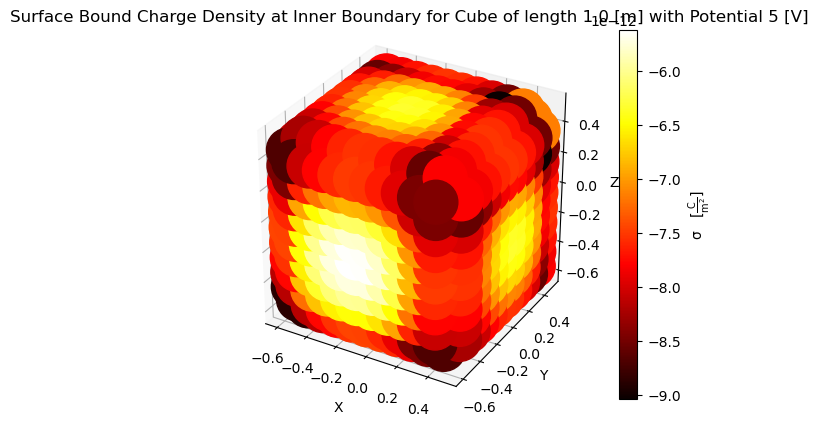

In [23]:
ax = plt.figure().add_subplot(projection='3d')
plt.title(f'Surface Bound Charge Density at Inner Boundary for Cube of length {round(2*l,4)} [m] with Potential {round(V,4)} [V]')
plot = ax.scatter(X[pos_cube_mask],Y[pos_cube_mask],Z[pos_cube_mask],marker = 'o',cmap = 'hot' ,c= sig_cube_b, s = 1000,alpha = 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
cbar = plt.colorbar(plot) 
cbar.set_label(r'$\mathrm{\sigma \quad [\frac{C}{m^2}]}$')    
plt.show()

#### Outer Bound Charge Calculation

**Masking for Region Just Inside of the Outside Surface of Dielectric**

In [24]:
scale = 2  
sphere_perm = np.where(((np.abs(X))**2 + (np.abs(Y))**2 + (np.abs(Z))**2 < (R)**2) & ((np.abs(X)+scale*ds)**2 + (np.abs(Y)+scale*ds)**2 + (np.abs(Z)+scale*ds)**2 > (R+scale*ds)**2))

**Electric Field Just on the inside of the outer surface of the dielectric**

In [25]:
x_E_cube_bound_out = x_E_cube_out[sphere_perm]
y_E_cube_bound_out = y_E_cube_out[sphere_perm]
z_E_cube_bound_out = z_E_cube_out[sphere_perm]

**Computation of Non-symmetric Electric Field**

Due to the lack of symmetry of the electric field from the cube and the normal vector of the sphere, the dot product between the radial unit vector and the electric field is needed

In [26]:
dot_x = x_E_cube_bound_out * X[sphere_perm]
dot_y = y_E_cube_bound_out * Y[sphere_perm]
dot_z = z_E_cube_bound_out * Z[sphere_perm]
sig_cube_out_b = (e_0*x_e/R) * (dot_x + dot_y + dot_z)

**Plot of Outer Surface Bound Charge Density**

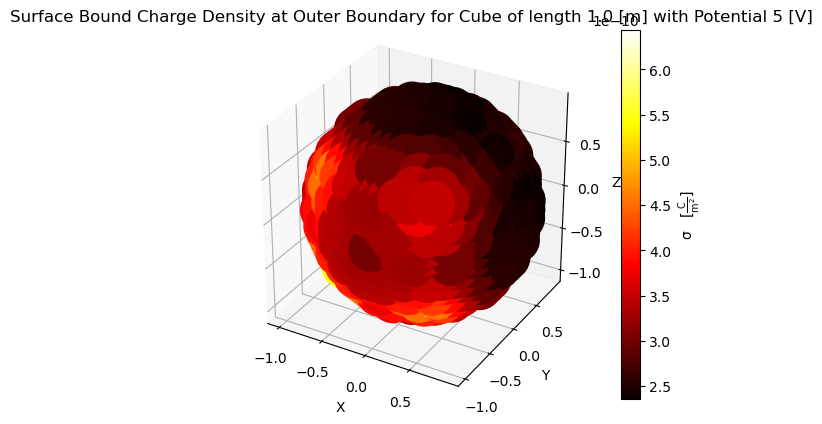

In [27]:
ax = plt.figure().add_subplot(projection='3d')
plt.title(f'Surface Bound Charge Density at Outer Boundary for Cube of length {round(l*2,4)} [m] with Potential {round(V,4)} [V]')
plot = ax.scatter(X[sphere_perm],Y[sphere_perm],Z[sphere_perm],marker = 'o',cmap = 'hot' ,c= sig_cube_out_b, s = 1000,alpha = 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
cbar = plt.colorbar(plot) 
cbar.set_label(r'$\mathrm{\sigma \quad [\frac{C}{m^2}]}$') 

### Free Bound Charge Calculation

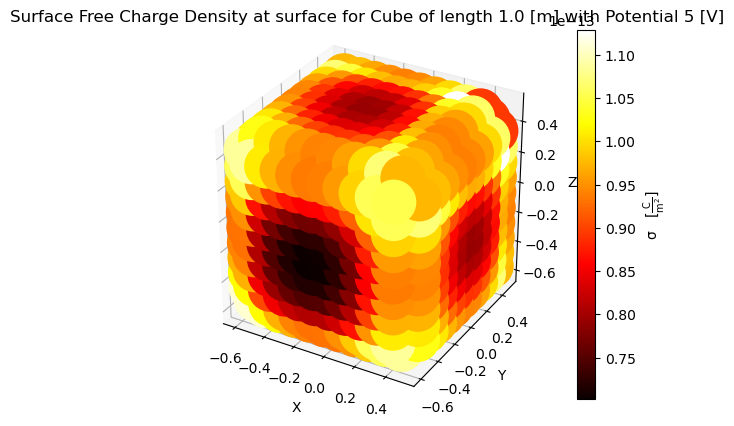

In [28]:
sig_cube_f = norm_E_cube_bound_in_one*e_0
ax = plt.figure().add_subplot(projection='3d')
plt.title(f'Surface Free Charge Density at surface for Cube of length {round(2*l,4)} [m] with Potential {round(V,4)} [V]')
plot = ax.scatter(X[pos_cube_mask],Y[pos_cube_mask],Z[pos_cube_mask],marker = 'o',cmap = 'hot' ,c= sig_cube_f, s = 1000,alpha = 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
cbar = plt.colorbar(plot)
cbar.set_label(r'$\mathrm{\sigma \quad [\frac{C}{m^2}]}$') 

## Part 2: The Cone

### Cone Potential Calculations

**Creation of Cone and Potential Calculations**

Also computing the midlength of the cube for slicing later

In [29]:
cone_index, cone_volt,cone_radius = cond_cone(R,cone_height,volt)
new_cone = relax(cone_volt,cone_index,100)
cone_len = cone_volt.shape[2]
cone_mid_len = int(round(cone_len,0)/2)

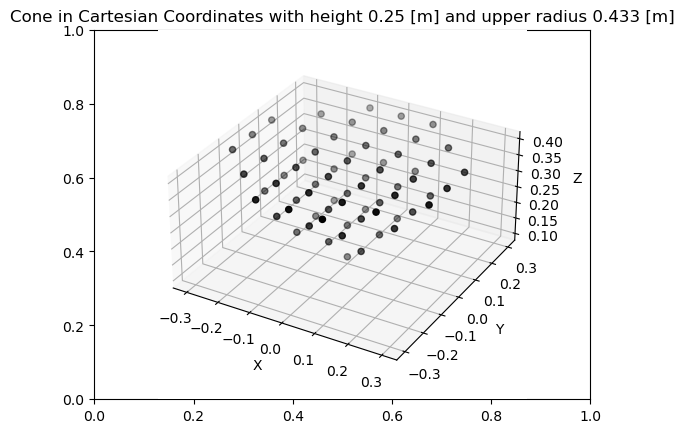

In [30]:
#Plotting positions of cone:
fig = plt.figure()
plt.title(f'Cone in Cartesian Coordinates with height {round(cone_height/2,4)} [m] and upper radius {round(cone_radius,4)} [m]')
ax = fig.add_subplot(projection='3d')
ax.scatter(X[cone_index], Y[cone_index], Z[cone_index],color = 'black')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')

### Contour Plots of Cone

**Constant X**

Locator attempting to generate 4900 ticks ([0.0, ..., 4.899]), which exceeds Locator.MAXTICKS (1000).


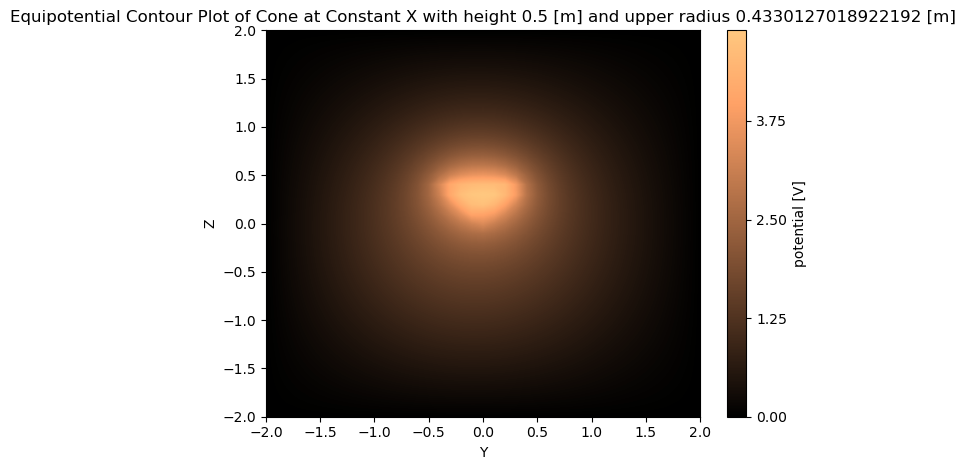

In [32]:
plt.title(f'Equipotential Contour Plot of Cone at Constant X with height {cone_height} [m] and upper radius {cone_radius} [m]')
plt.contourf(X[:,:,cone_mid_len,],Y[:,:,cone_mid_len,],new_cone[cone_mid_len,:,:],levels = 5000,cmap = 'copper')
plt.xlabel('Y')
plt.ylabel('Z')
plt.colorbar(label = 'potential [V]',ticks = np.linspace(0,V,V))
plt.tight_layout()
plt.show()

**Constant Y**

Locator attempting to generate 4900 ticks ([0.0, ..., 4.899]), which exceeds Locator.MAXTICKS (1000).


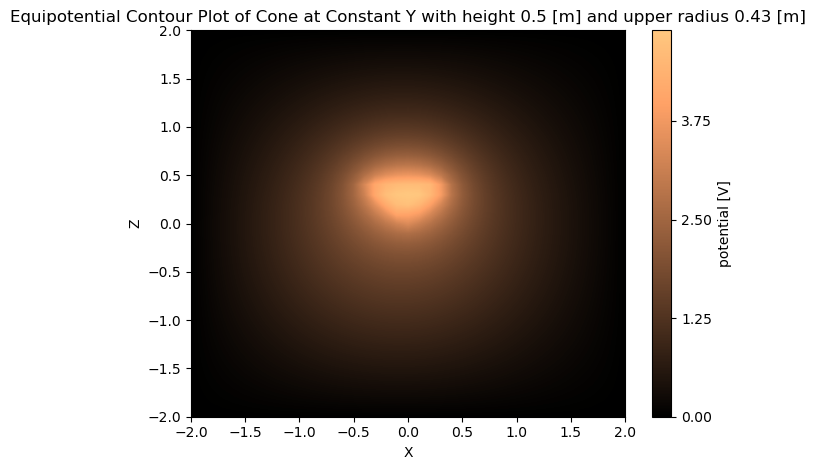

In [34]:
plt.title(f'Equipotential Contour Plot of Cone at Constant Y with height {cone_height} [m] and upper radius {round(cone_radius,2)} [m]')
plt.contourf(X[:,:,cone_mid_len,],Y[:,:,cone_mid_len,],new_cone[:,cone_mid_len,:],levels = 5000,cmap = 'copper')
plt.xlabel('X')
plt.ylabel('Z')
plt.colorbar(label = 'potential [V]',ticks = np.linspace(0,V,V))
plt.tight_layout()
plt.show()

**Constant Z**

Locator attempting to generate 4234 ticks ([0.0, ..., 3.3864]), which exceeds Locator.MAXTICKS (1000).


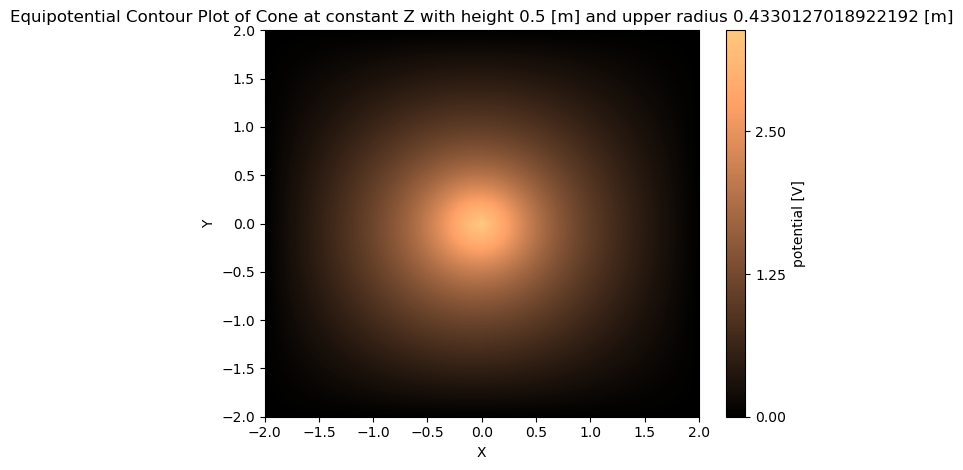

In [35]:
plt.title(f'Equipotential Contour Plot of Cone at constant Z with height {cone_height} [m] and upper radius {cone_radius} [m]')
plt.contourf(X[:,:,cone_mid_len,],Y[:,:,cone_mid_len,],new_cone[:,:,cone_mid_len],levels = 5000,cmap = 'copper')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label = 'potential [V]',ticks = np.linspace(0,V,V))
plt.tight_layout()
plt.show()

### Electric Field Cone Calculations

**Creation of Two Separate Potential Arrays**

In [36]:
V_in_cone = np.zeros((new_cone.shape),dtype = np.float64) 
V_in_cone[perm_index] = new_cone[perm_index]           

**The Electric Field Inside the Dielectric**

In [37]:
E_cone_in = np.gradient(V_in_cone) * -np.ones((V_in_cone.shape),dtype = np.float64) / (np.ones((V_in_cone.shape),dtype = np.float64)*x_e)   
x_E_cone_in = E_cone_in[0]        #E_x vector inside of dielectric
y_E_cone_in = E_cone_in[1]        #E_y vector inside of dielectric
z_E_cone_in = E_cone_in[2]        #E_z vector inside of dielectric

**The Electric Field Outside the Dielectric**

In [38]:
E_cone_out =  np.gradient(new_cone) * -np.ones((new_cone.shape),dtype = np.float64)        
x_E_cone_out = E_cone_out[0]      #E_x vector outside of dielectric
y_E_cone_out = E_cone_out[1]      #E_y vector outside of dielectric
z_E_cone_out = E_cone_out[2]      #E_z vector outside of dielectric

**3D Electric Field Plot**

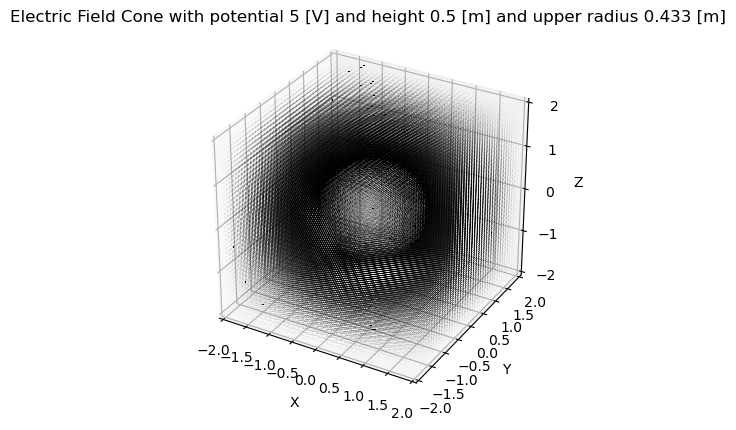

In [39]:
ax = plt.figure().add_subplot(projection='3d')
plt.title(f"Electric Field Cone with potential {V} [V] and height {cone_height} [m] and upper radius {round(cone_radius,3)} [m]")
ax.quiver(X[perm_index], Y[perm_index], Z[perm_index], x_E_cone_in[perm_index], y_E_cone_in[perm_index], z_E_cone_in[perm_index], length=.1,arrow_length_ratio=0.5,color = 'black')
ax.quiver(X[other_index], Y[other_index], Z[other_index], x_E_cone_out[other_index], y_E_cone_out[other_index], z_E_cone_out[other_index], length=.1,arrow_length_ratio=0.5,color = 'black')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
ax.set_xlim(-2*R,2*R)
ax.set_ylim(-2*R,2*R)
plt.show()

**2D Electric Field Plot Along the X Plane**

(-2.0, 2.0)

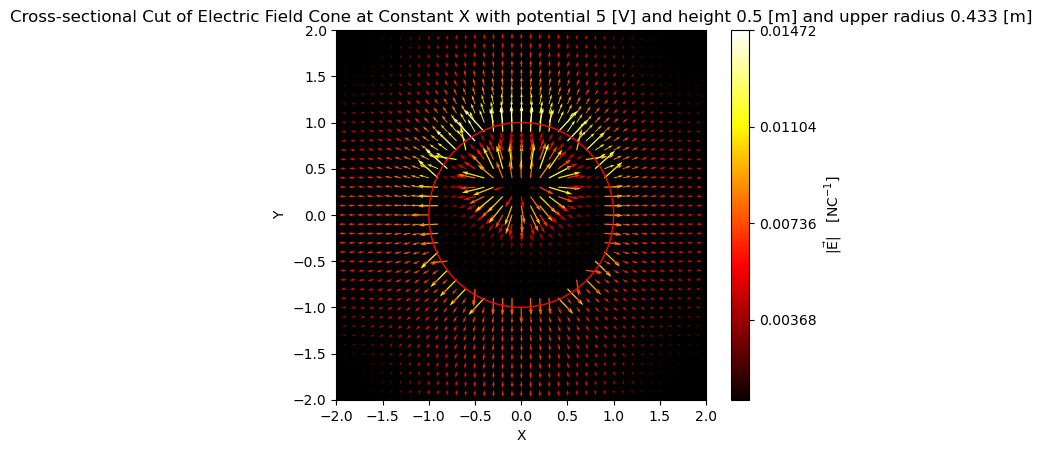

In [40]:
#slices the electric field within dielectric at midpoint
y_in_pl_cone_const_x = y_E_cone_in[cone_mid_len,:,:]        
z_in_pl_cone_const_x = z_E_cone_in[cone_mid_len,:,:]  

#slices the electric field outside dielectric at midpoint 
y_out_pl_cone_const_x = y_E_cone_out[cone_mid_len,:,:]     
z_out_pl_cone_const_x = z_E_cone_out[cone_mid_len,:,:]

#slices the positions
X_cone_const_x = X[cone_mid_len,:,:]                        
Y_cone_const_x = Y[cone_mid_len,:,:]
Z_cone_const_x = Z[cone_mid_len,:,:]

#grabs 2D indices of the slices that is within the dielectric
new_index_cone_const_x = np.where(X_cone_const_x**2 + Y_cone_const_x**2 + Z_cone_const_x**2 < R)    #grabs 2D indices of the slices that is within the dielectric

#grabs 2D indices of the slices that is outside the dielectric
out_index_cone_const_x = np.where(X_cone_const_x**2 + Y_cone_const_x**2 + Z_cone_const_x**2 > R)    #grabs 2D indices of the slices that is outside the dielectric

#relating color of plot to magnitude of vectors
color_in_cone_const_x = np.sqrt(y_in_pl_cone_const_x**2 + z_in_pl_cone_const_x**2)      #related color to magnitude
color_out_cone_const_x = np.sqrt(y_out_pl_cone_const_x**2 + z_out_pl_cone_const_x**2)   #related color to magnitude

fig, ax = plt.subplots()
ax.set_title(f"Cross-sectional Cut of Electric Field Cone at Constant X with potential {V} [V] and height {cone_height} [m] and upper radius {round(cone_radius,3)} [m]")
ax.set_aspect('equal')
ax.set_facecolor('black')
ax.set_xlabel('X')
ax.set_ylabel('Y')
quiver_1 = ax.quiver(Y_cone_const_x[new_index_cone_const_x],Z_cone_const_x[new_index_cone_const_x],y_in_pl_cone_const_x[new_index_cone_const_x],z_in_pl_cone_const_x[new_index_cone_const_x],color_in_cone_const_x[new_index_cone_const_x],units='xy',angles='xy',scale_units='xy',headlength=5,cmap='hot')    
quiver_2 = ax.quiver(Y_cone_const_x[out_index_cone_const_x],Z_cone_const_x[out_index_cone_const_x],y_out_pl_cone_const_x[out_index_cone_const_x],z_out_pl_cone_const_x[out_index_cone_const_x],color_out_cone_const_x[out_index_cone_const_x],units='xy',angles='xy',scale_units='xy',headlength=5,cmap='hot')
cbar = plt.colorbar(quiver_1,ticks = np.linspace(0,np.max(color_in_cone_const_x),5))      #creates colorbar. Used quiver 1 because max values are with it
cbar.set_label(r'$|\mathrm{\vec{E}}| \quad [\mathrm{N C^{-1}}]$')
ax.add_patch(plt.Circle((0, 0), R, color='red', fill=False))
ax.set_xlim(-2*R,2*R)
ax.set_ylim(-2*R,2*R)

**2D Electric Field Plot Along the Z-Axis**

(-2.0, 2.0)

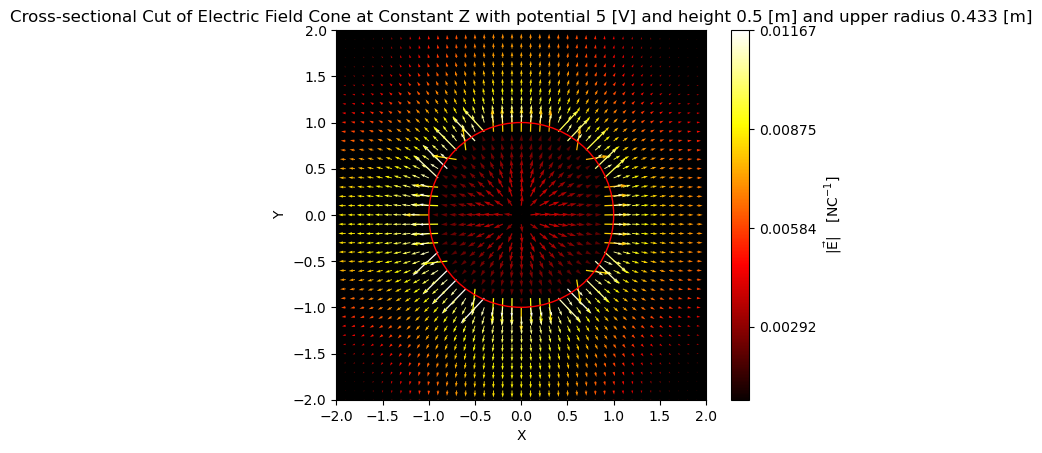

In [41]:
#slices the electric field within dielectric at midpoint
x_in_pl_cone_const_z = x_E_cone_in[:, :, cone_mid_len]        
y_in_pl_cone_const_z = y_E_cone_in[:, :, cone_mid_len]  

#slices the electric field outside dielectric at midpoint 
x_out_pl_cone_const_z = x_E_cone_out[:, :, cone_mid_len]     
y_out_pl_cone_const_z = y_E_cone_out[:, :, cone_mid_len]

#slices the positions
X_cone_const_z = X[:, :, cone_mid_len]                         
Y_cone_const_z = Y[:, :, cone_mid_len]
Z_cone_const_z = Z[:, :, cone_mid_len]

#grabs 2D indices of the slices that is within the dielectric
new_index_cone_const_z = np.where(X_cone_const_z**2 + Y_cone_const_z**2 + Z_cone_const_z**2 < R)    #grabs 2D indices of the slices that is within the dielectric

#grabs 2D indices of the slices that is outside the dielectric
out_index_cone_const_z = np.where(X_cone_const_z**2 + Y_cone_const_z**2 + Z_cone_const_z**2 > R)    #grabs 2D indices of the slices that is outside the dielectric

#related color to magnitude
color_in_cone_const_z = np.sqrt(x_in_pl_cone_const_z**2 + y_in_pl_cone_const_z**2)      
color_out_cone_const_z = np.sqrt(x_out_pl_cone_const_z**2 + y_out_pl_cone_const_z**2)   

fig, ax = plt.subplots()
ax.set_title(f"Cross-sectional Cut of Electric Field Cone at Constant Z with potential {V} [V] and height {round(cone_height,3)} [m] and upper radius {round(cone_radius,3)} [m]")
ax.set_aspect('equal')
ax.set_facecolor('black')
ax.set_xlabel('X')
ax.set_ylabel('Y')
quiver_1 = ax.quiver(X_cone_const_z[new_index_cone_const_z],Y_cone_const_z[new_index_cone_const_z],x_in_pl_cone_const_z[new_index_cone_const_z],y_in_pl_cone_const_z[new_index_cone_const_z],color_in_cone_const_z[new_index_cone_const_z],units='xy',angles='xy',scale_units='xy',headlength=5,cmap='hot')   
quiver_2 = ax.quiver(X_cone_const_z[out_index_cone_const_z],Y_cone_const_z[out_index_cone_const_z],x_out_pl_cone_const_z[out_index_cone_const_z],y_out_pl_cone_const_z[out_index_cone_const_z],color_out_cone_const_z[out_index_cone_const_z],units='xy',angles='xy',scale_units='xy',headlength=5,cmap='hot')
cbar = plt.colorbar(quiver_1,ticks = np.linspace(0,np.max(color_in_cone_const_z),5))      #creates colorbar. Used quiver 1 because max values are with it
cbar.set_label(r'$|\mathrm{\vec{E}}| \quad [\mathrm{N C^{-1}}]$')
ax.add_patch(plt.Circle((0, 0), R, color='red', fill=False))
ax.set_xlim(-2*R,2*R)
ax.set_ylim(-2*R,2*R)

### Charge Density Calculations

**Masking for Region Just Outside Cone**

In [42]:
pos_cone_mask = np.zeros((x.size,y.size,z.size),dtype = bool)     
pos_cone_mask[cone_index] = True                                   
pos_cone_mask[1:-1,1:-1,1:-1] = (pos_cone_mask[2:,1:-1,1:-1] | pos_cone_mask[0:-2,1:-1,1:-1] 
| pos_cone_mask[1:-1,2:,1:-1] | pos_cone_mask[1:-1,0:-2,1:-1] 
| pos_cone_mask[1:-1,1:-1,2:] | pos_cone_mask[1:-1,1:-1,0:-2])
pos_cone_mask[cone_index] = False  

#### Inner Bound Charge Calculation

**Grabing Correct Electric Fields for Region of Interest**

In [43]:
x_E_cone_bound_in = x_E_cone_in[pos_cone_mask]
y_E_cone_bound_in = y_E_cone_in[pos_cone_mask]
z_E_cone_bound_in = z_E_cone_in[pos_cone_mask]
norm_E_cone_bound_in_one = np.sqrt(x_E_cone_bound_in**2 +
                                    y_E_cone_bound_in**2 + z_E_cone_bound_in**2)

**Computation**

I am taking the negative magnitude of the electric field because the electric field is antiparrallel to the normal vector of the dielectric on the inner surface of it

In [44]:
sig_cone_b = -norm_E_cone_bound_in_one*e_0*x_e

**Plot of Inner Surface Bound Charge Density**

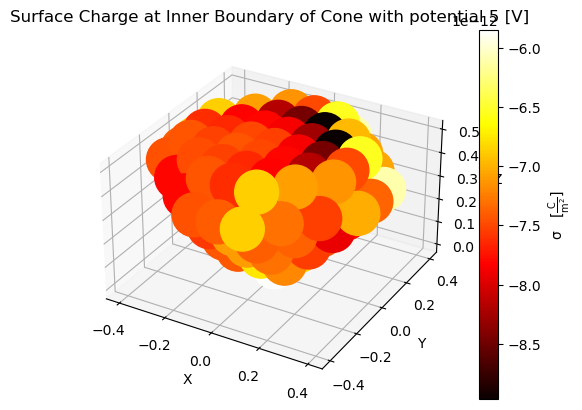

In [45]:
ax = plt.figure().add_subplot(projection='3d')
plt.title(f'Surface Charge at Inner Boundary of Cone with potential {round(V,4)} [V]')
plot = ax.scatter(X[pos_cone_mask],Y[pos_cone_mask],Z[pos_cone_mask],marker = 'o',cmap = 'hot' ,c= sig_cone_b, s = 1000,alpha = 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
cbar = plt.colorbar(plot)  
cbar.set_label(r'$\mathrm{\sigma \quad [\frac{C}{m^2}]}$')    
plt.show()

#### Outer Bound Charge Density Calculation

**Grabing the Electric Field Just on the Inside of the Dielectric**

In [46]:
x_E_cone_bound_out = x_E_cone_out[sphere_perm]
y_E_cone_bound_out = y_E_cone_out[sphere_perm]
z_E_cone_bound_out = z_E_cone_out[sphere_perm]

**Computation**

Again, I have to compute the dot product due to lack of symmetry

In [47]:
dot_x_cone = x_E_cone_bound_out * X[sphere_perm]
dot_y_cone = y_E_cone_bound_out * Y[sphere_perm]
dot_z_cone = z_E_cone_bound_out * Z[sphere_perm]
sig_cone_out = (e_0*x_e/R) * (dot_x_cone + dot_y_cone + dot_z_cone)

**Plot of Outer Bound Charge Density**

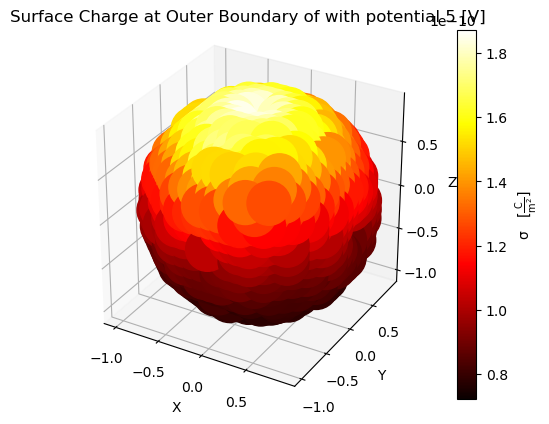

In [48]:
#Outer Boundary Surface Charge Density
ax = plt.figure().add_subplot(projection='3d')
plt.title(f'Surface Charge at Outer Boundary of with potential {round(V,4)} [V]')
plot = ax.scatter(X[sphere_perm],Y[sphere_perm],Z[sphere_perm],marker = 'o',cmap = 'hot' ,c= sig_cone_out, s = 1000,alpha = 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
cbar = plt.colorbar(plot)  
cbar.set_label(r'$\mathrm{\sigma \quad [\frac{C}{m^2}]}$') 

#### Free Charge Density Calculation

**Computation and Plot**

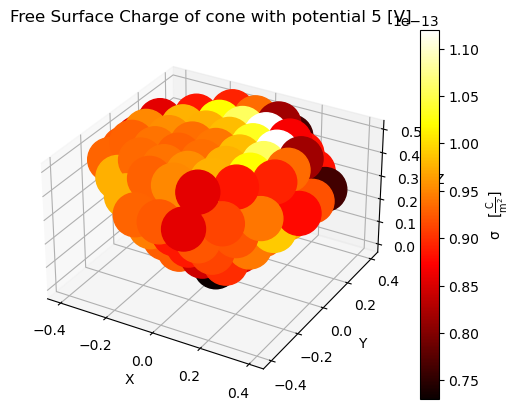

In [50]:
sig_cone_f = norm_E_cone_bound_in_one*e_0

ax = plt.figure().add_subplot(projection='3d')
plt.title(f'Free Surface Charge of cone with potential {round(V,4)} [V]')
plot = ax.scatter(X[pos_cone_mask],Y[pos_cone_mask],Z[pos_cone_mask],marker = 'o',cmap = 'hot' ,c= sig_cone_f, s = 1000,alpha = 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
cbar = plt.colorbar(plot)  
cbar.set_label(r'$\mathrm{\sigma \quad [\frac{C}{m^2}]}$') 